In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


In [2]:
# CNS1 Defn, SYMPTOMS

data = LymeData({CHRONIC, NEURO},{SYMPTOMS},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
data.drop_one_label(NON_NEURO) # SINGLE LABEL

print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': [4],'lambda': list(np.linspace(0,1,100)), 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(3598, 13)
Index(['Fatigue', 'Headache', 'Joint Pain', 'Muscle aches', 'Neuropathy',
       'Twitching', 'Memory Loss', 'Cognitive Impairment', 'Sleep Impairment',
       'Psychiatric', 'Heart related', 'Gastrointestinal', 'neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


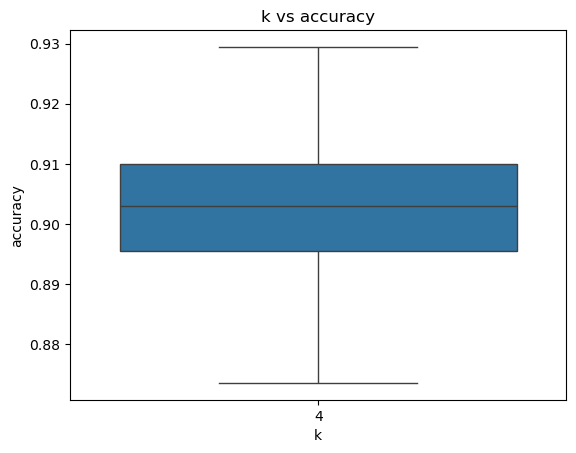

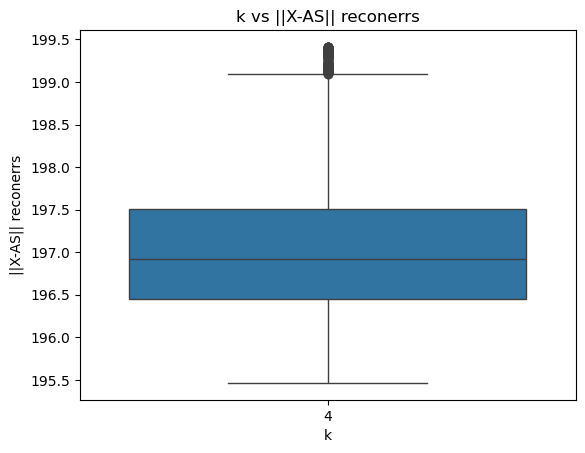

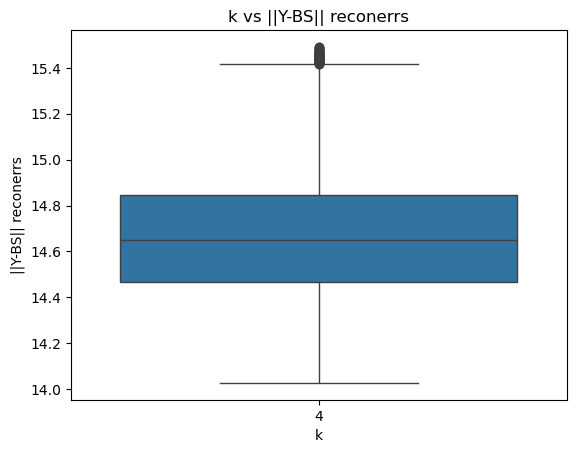

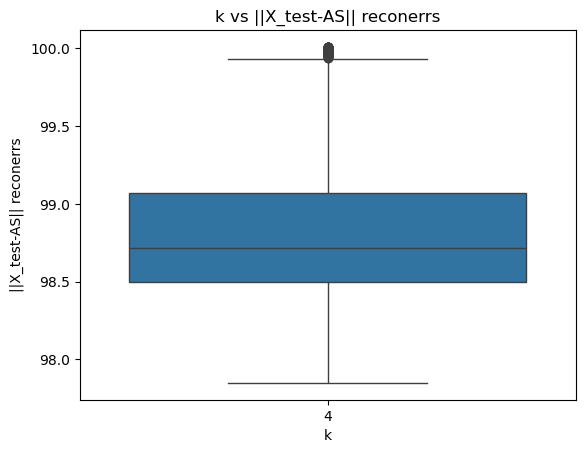

CNS1 Working Definition: Neuro vs Non-Neuro
best accuracy:  0.9294655797101449  best params:  {'k': 4, 'lambda': 0.6464646464646465, 'random_state': 28}
test_accuracy:  (0.8888888888888888, 115.11902495943912)


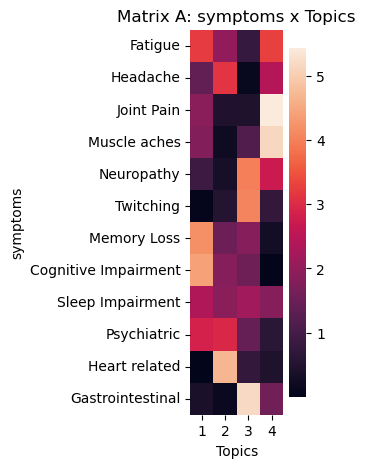

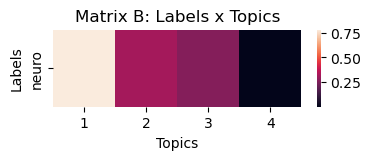

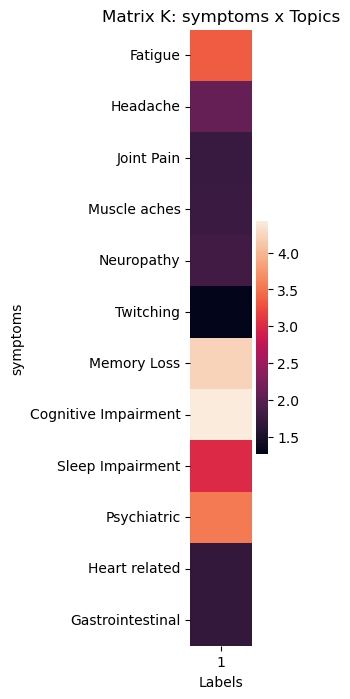

In [3]:

display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')
display_distr(Xtestreconerr_distr, ylabel='||X_test-AS|| reconerrs')

print('CNS1 Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = SYMPTOMS
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)

# Total Neuro: 2569
# Total Non-Neuro: 1394

In [4]:
accu_distr.to_csv('CNS1_NvN_SL_accu_distr.csv', index=False)
Xreconerr_distr.to_csv('CNS1_NvN_SL_Xreconerr_distr.csv', index=False)
Yreconerr_distr.to_csv('CNS1_NvN_SL_Yreconerr_distr.csv', index=False)
Xtestreconerr_distr.to_csv('CNS1_NvN_SL_Xcvtst_reconerr_distr.csv', index=False)

In [5]:
# Accuracy distribution statistics
mean = accu_distr.mean()
Q1 = accu_distr.quantile(0.25)
Q3 = accu_distr.quantile(0.75)
print('Mean Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Accuracy:
4    0.90226
dtype: float64
IQR:
4    0.014595
dtype: float64


In [6]:
# Xreconerr distribution statistics
mean = Xreconerr_distr.mean()
Q1 = Xreconerr_distr.quantile(0.25)
Q3 = Xreconerr_distr.quantile(0.75)
print('Mean Xreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Xreconerr_distr:
4    197.032901
dtype: float64
IQR:
4    1.060441
dtype: float64


In [7]:
# Yreconerr distribution statistics
mean = Yreconerr_distr.mean()
Q1 = Yreconerr_distr.quantile(0.25)
Q3 = Yreconerr_distr.quantile(0.75)
print('Mean Yreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Yreconerr_distr:
4    14.675047
dtype: float64
IQR:
4    0.381334
dtype: float64


In [9]:
# Yreconerr distribution statistics
mean = Xtestreconerr_distr.mean()
Q1 = Xtestreconerr_distr.quantile(0.25)
Q3 = Xtestreconerr_distr.quantile(0.75)
print('Mean Xtestreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Xtestreconerr_distr:
4    98.805852
dtype: float64
IQR:
4    0.574333
dtype: float64
